# Домашнее задание по теме: Кластеризация

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
# !conda install basemap matplotlib -y

In [4]:
# !conda install -c conda-forge umap-learn -y

In [5]:
# ipympl + widget включает интерактивные функции matplotlib

# !conda install ipympl -y
# !conda install -c conda-forge nodejs

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import numpy as np
import pandas as pd

from umap import UMAP
from sklearn.decomposition import PCA

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

### Загрузка данных

[Источник (Customer Clustering)](https://www.kaggle.com/dev0914sharma/customer-clustering)

In [7]:
df = pd.read_csv("./../../data/segmentation data.csv", index_col=0)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


## Анализ данных

### Типы данных

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


### Пропущенные значения

In [9]:
df.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

### Распределение данных

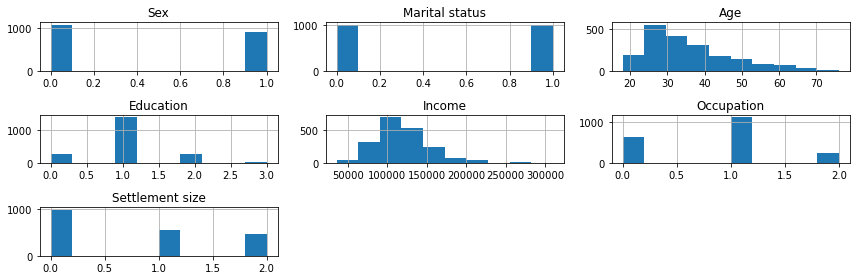

In [10]:
df.hist(figsize=(12, 4))
plt.tight_layout()

## Подготовка

### Масштабирование

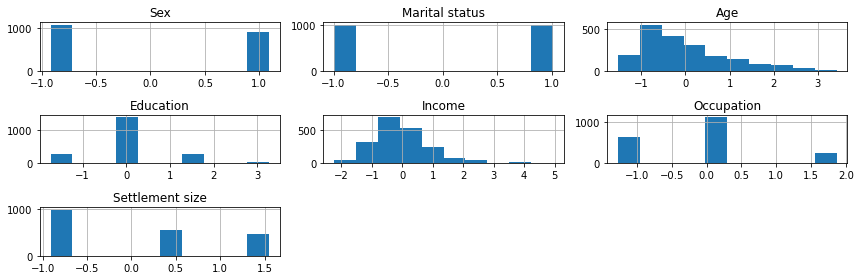

In [11]:
df_norm = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df_norm.hist(figsize=(12, 4))
plt.tight_layout()

### Полезные функции

In [12]:
def explained_variance_plot(pca_obj):
    features = range(pca_obj.n_components_)
    cumulative_sum = np.cumsum(pca_obj.explained_variance_ratio_)

    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)

    plt.bar(features, pca_obj.explained_variance_ratio_, align='center', label='Individual explained variance')
    plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid',label='Cumulative explained variance')

    plt.legend(loc='best')
    plt.tight_layout()

In [13]:
%load_ext autotime

time: 234 µs (started: 2021-06-26 15:10:16 +03:00)


## Визуализация данных

### N-D PCA

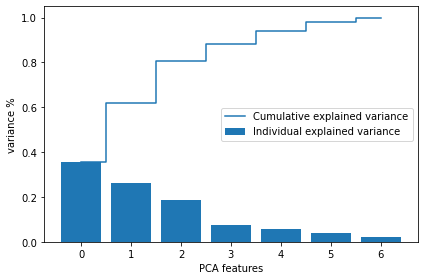

time: 319 ms (started: 2021-06-26 15:10:16 +03:00)


In [14]:
pca = PCA()
pca.fit(df_norm)
explained_variance_plot(pca)

### 3-D PCA

In [15]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

time: 11.5 ms (started: 2021-06-26 15:10:17 +03:00)


In [16]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 86.5 ms (started: 2021-06-26 15:10:17 +03:00)


In [17]:
%matplotlib inline

time: 4.75 ms (started: 2021-06-26 15:10:17 +03:00)


### 3-D UMAP

In [18]:
umap_3 = UMAP(n_components=3)
df_umap_3 = pd.DataFrame(umap_3.fit_transform(df_norm))

time: 11.6 s (started: 2021-06-26 15:10:17 +03:00)


In [19]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 41.4 ms (started: 2021-06-26 15:10:28 +03:00)


In [20]:
%matplotlib inline

time: 2.12 ms (started: 2021-06-26 15:10:28 +03:00)


## Функция оценки силуэта

In [21]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

def silhouette_plot(X, labels):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # 1-й подзаголовок - это силуэтный график
    # Коэффициент силуэта может варьироваться в пределах [-1, 1], 
    # но в этом примере все лежат в пределах [-0.1, 1]
    ax.set_xlim([-0.1, 1])

    # (n_clusters+1)*10 предназначен для вставки пустого пространства 
    # между силуэтами отдельных кластеров, чтобы четко их разграничить
    n_clusters = len(set(labels))
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # silhouette_score дает среднее значение для всех выборок
    # это дает представление о плотности и разделении сформированных кластеров
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        # агрегация оценок силуэта для выборок, принадлежащих
        # кластеру  i и их сортировка
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # обозначить участки силуэта номерами кластеров в середине
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # вычислить новый y_lower для следующего участка
        y_lower = y_upper + 10  # 10 для 0 выборки

    ax.set_title("The silhouette plot for the various clusters")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # вертикальная линия для средней оценки силуэта всех значений
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # метки осей
    ax.set_yticks([])  
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

time: 1.45 ms (started: 2021-06-26 15:10:28 +03:00)


## K-means

### Выбор `n_clusters`

In [22]:
inertias = []
Ks = range(1, 25)
for k in Ks:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    inertias.append(km.inertia_)

time: 3.08 s (started: 2021-06-26 15:10:28 +03:00)


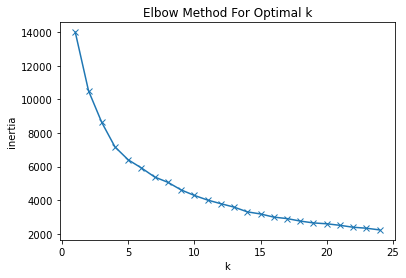

time: 170 ms (started: 2021-06-26 15:10:31 +03:00)


In [23]:
plt.plot(Ks, inertias, 'x-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### Построение модели

In [24]:
kmeans_3 = KMeans(init="k-means++", 
                   n_clusters=3, 
                   n_init=15).fit(df_norm)

time: 193 ms (started: 2021-06-26 15:10:32 +03:00)


In [25]:
kmeans_3_clusters = kmeans_3.n_clusters
kmeans_3_labels = kmeans_3.labels_

time: 381 µs (started: 2021-06-26 15:10:32 +03:00)


### Анализ результатов

In [26]:
df["kmeans_3"] = kmeans_3_labels
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_3
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000002,1,1,22,1,150773,1,2,0
100000003,0,0,49,1,89210,0,0,2
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,0
100001997,1,1,27,1,117744,1,0,0
100001998,0,0,31,0,86400,0,0,2


time: 14.1 ms (started: 2021-06-26 15:10:32 +03:00)


### Colormap

In [27]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# можно заменить на любые цвета (и любое нужно количество)
# см. список цветов https://matplotlib.org/stable/gallery/color/named_colors.html
# или любой RGB
cmap_7 = ListedColormap(['black', 
                         'chocolate', 
                         'fuchsia', 
                         'blue',
                         'lime', 
                         'aqua', 
                         'crimson'])

cmap_3 = ListedColormap(['fuchsia', 
                         'lime', 
                         'blue'])

time: 512 µs (started: 2021-06-26 15:10:32 +03:00)


### Оценка силуэта (Silhouette Score)

Типичные графики силуэта представляют метку кластера на оси y, а фактический показатель силуэта — на оси x.

Silhouette Score отображает меру того, **насколько близко каждая точка в кластере находится к точкам в соседних кластерах.**

**Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.**

**Размер/толщина силуэтов также пропорциональны количеству образцов внутри этого кластера.**

Чем выше коэффициенты силуэта (чем ближе к +1), тем дальше образцы кластера находятся от образцов соседних кластеров.

Значение 0 указывает, что образец находится на границе принятия решения между двумя соседними кластерами или очень близко к ней.

Отрицательные значения, напротив, указывают на то, что эти образцы могли быть отнесены к неправильному кластеру.

For n_clusters = 3 The average silhouette_score is : 0.27177060998494357


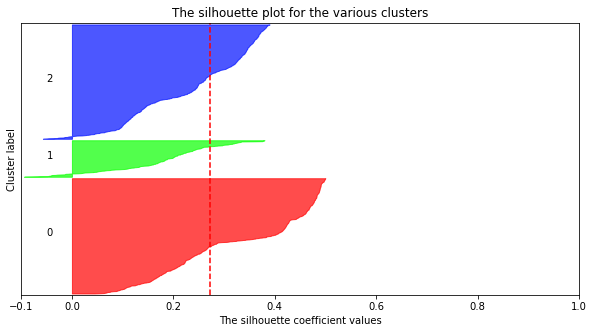

time: 370 ms (started: 2021-06-26 15:10:32 +03:00)


In [28]:
silhouette_plot(df_norm, kmeans_3_labels)

### 3-D PCA

In [29]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           c=kmeans_3_labels, 
           alpha=0.3,
           s=30,
           cmap=cmap_3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 42.2 ms (started: 2021-06-26 15:10:32 +03:00)


In [30]:
%matplotlib inline

time: 2.21 ms (started: 2021-06-26 15:10:32 +03:00)


### 3-D UMAP

In [31]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=0, elev=15)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           c=kmeans_3_labels, 
           alpha=0.3,
           s=60,
           cmap=cmap_3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 42.7 ms (started: 2021-06-26 15:10:32 +03:00)


In [32]:
%matplotlib inline

time: 1.58 ms (started: 2021-06-26 15:10:32 +03:00)


### Анализ "представителей" кластеров

In [33]:
df.groupby('kmeans_3').mean().round(2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
kmeans_3,,,,,,,
0,0.90,0.81,30.13,1.03,104168.26,0.58,0.34
1,0.48,0.66,55.67,2.11,157936.38,1.12,1.09
2,0.00,0.13,35.41,0.70,126037.97,0.95,1.02


time: 21.4 ms (started: 2021-06-26 15:10:32 +03:00)


In [34]:
df.groupby('kmeans_3').median().round(2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
kmeans_3,,,,,,,
0,1.0,1.0,28.0,1.0,104674.5,1.0,0.0
1,0.0,1.0,57.0,2.0,146117.0,1.0,1.0
2,0.0,0.0,35.0,1.0,121970.0,1.0,1.0


time: 15.4 ms (started: 2021-06-26 15:10:32 +03:00)


In [35]:
clusters = {}

for c in range(kmeans_3_clusters):
    clusters[c] = df[df['kmeans_3'] == c]
    display(clusters[c])
    display(clusters[c].describe())
    print('\n', '=' * 100, '\n')

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_3
ID,,,,,,,,
100000002,1,1,22,1,150773,1,2,0
100000011,1,1,25,1,108469,1,0,0
100000012,1,1,24,1,127596,1,0,0
100000013,1,1,22,1,108687,1,2,0
100000015,1,1,28,1,102899,1,1,0
...,...,...,...,...,...,...,...,...
100001993,1,0,51,1,101074,0,0,0
100001994,1,0,38,1,87670,0,0,0
100001996,1,0,47,1,123525,0,0,0


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_3
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.0
mean,0.897229,0.808314,30.127021,1.031178,104168.264434,0.579677,0.344111,0.0
std,0.303835,0.393855,7.477908,0.322845,26313.515172,0.542955,0.620884,0.0
min,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,25.000000,1.000000,87973.250000,0.000000,0.000000,0.0
50%,1.000000,1.000000,28.000000,1.000000,104674.500000,1.000000,0.000000,0.0
75%,1.000000,1.000000,34.000000,1.000000,118552.500000,1.000000,1.000000,0.0
max,1.000000,1.000000,59.000000,2.000000,223185.000000,2.000000,2.000000,0.0


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_3
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000009,0,1,61,2,151591,0,0,1
100000014,0,0,60,2,89374,0,0,1
100000019,1,1,44,2,261952,2,2,1
100000028,1,1,42,2,163025,1,1,1
...,...,...,...,...,...,...,...,...
100001571,1,1,61,2,97558,0,0,1
100001573,1,1,67,3,128053,1,0,1
100001577,1,1,67,3,128343,0,0,1


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_3
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.0
mean,0.483636,0.661818,55.665455,2.105455,157936.381818,1.116364,1.090909,1.0
std,0.500643,0.473953,10.530668,0.381802,47507.797189,0.673471,0.780060,0.0
min,0.000000,0.000000,23.000000,1.000000,69487.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,47.000000,2.000000,127788.500000,1.000000,0.000000,1.0
50%,0.000000,1.000000,57.000000,2.000000,146117.000000,1.000000,1.000000,1.0
75%,1.000000,1.000000,64.000000,2.000000,173857.500000,2.000000,2.000000,1.0
max,1.000000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000,1.0


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_3
ID,,,,,,,,
100000003,0,0,49,1,89210,0,0,2
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
100000006,0,0,35,1,144848,0,0,2
100000007,0,0,53,1,156495,1,1,2
...,...,...,...,...,...,...,...,...
100001988,0,0,25,0,66628,0,0,2
100001992,0,0,54,1,128537,1,0,2
100001995,0,0,45,1,113414,1,0,2


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_3
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.0
mean,0.004657,0.129220,35.413271,0.703143,126037.969732,0.945285,1.024447,2.0
std,0.068120,0.335639,8.313236,0.457139,34873.171386,0.637255,0.822531,0.0
min,0.000000,0.000000,20.000000,0.000000,43684.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,29.000000,0.000000,104278.000000,1.000000,0.000000,2.0
50%,0.000000,0.000000,35.000000,1.000000,121970.000000,1.000000,1.000000,2.0
75%,0.000000,0.000000,41.000000,1.000000,145679.500000,1.000000,2.000000,2.0
max,1.000000,1.000000,58.000000,1.000000,268906.000000,2.000000,2.000000,2.0




time: 137 ms (started: 2021-06-26 15:10:32 +03:00)


### <Проверка гипетез / Дополнительные графики>

In [36]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_3
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000002,1,1,22,1,150773,1,2,0
100000003,0,0,49,1,89210,0,0,2
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,0
100001997,1,1,27,1,117744,1,0,0
100001998,0,0,31,0,86400,0,0,2


time: 12.1 ms (started: 2021-06-26 15:10:33 +03:00)


In [60]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, azim=-45, elev=25)


ax.scatter(df.Education, df.Occupation, df.Age, 
           c=df['kmeans_3'],
           alpha=0.5, 
           s=60, 
           cmap=cmap_3)

ax.set_xlabel('Education')
ax.set_ylabel('Occupation')
ax.set_zlabel('Age')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Age')

time: 41.7 ms (started: 2021-06-26 15:17:13 +03:00)


In [61]:
%matplotlib inline

time: 1.69 ms (started: 2021-06-26 15:17:28 +03:00)


## DBSCAN